# 可視化

## wordcloudの表示

このセルの実行には，「ginzaの使い方」ノートブックにある，「パッケージのインストール」と「解析対象のデータをダウンロード」を予め実行しておく必要がある．

In [3]:
import re
import sys
import matplotlib.pyplot as plt
import spacy
import wordcloud
%matplotlib inline

input_fn = 'text/kageotoko.corpus.txt'

include_pos = ('NOUN', 'VERB', 'ADJ')
stopwords = ('する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう')

nlp = spacy.load("ja_ginza")

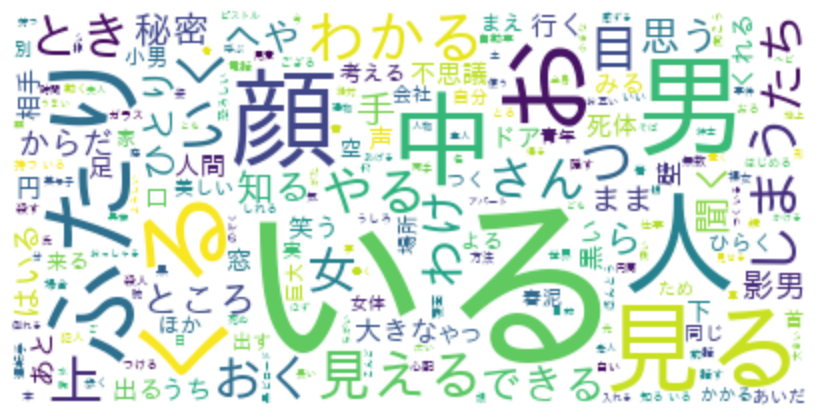

In [4]:
def chunk(lst, n):
    """
    リストをn個ずつのサブリストに分割する。
    """
    return [lst[i:i+n] for i in range(0, len(lst), n)]


with open(input_fn, 'r') as f:
    lines = [l.replace("\n","") for l in f.readlines()]


lst_texts = chunk(lines,100)
lst_tokens = []
for text in lst_texts:
    doc = nlp(" ".join(text))
    lst_tokens.extend([
        token.lemma_ for token in doc
        if token.pos_ in include_pos and token.lemma_ not in stopwords
    ])


wc = wordcloud.WordCloud(
    background_color='white',
    font_path='fonts/IPAexfont00401/ipaexg.ttf',
    max_font_size=100)
img = wc.generate(' '.join(lst_tokens))

plt.figure(figsize=(8, 4))
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()